In [6]:
import numpy as np

def initialize_field(x_range, y_range, grid_size, order=4, seed=0):
    """
    Initialize the field based on a truncated Fourier series with random coefficients.
    
    :param x_range: tuple, range of x values e.g., (0, 1)
    :param y_range: tuple, range of y values e.g., (0, 1)
    :param grid_size: int, size of the grid
    :param order: int, order of the Fourier series
    :param seed: int, random seed for reproducibility
    
    :return: np.array, initialized field
    """
    np.random.seed(seed)
    
    # Create a grid of x and y values
    x = np.linspace(x_range[0], x_range[1], grid_size)
    y = np.linspace(y_range[0], y_range[1], grid_size)
    x, y = np.meshgrid(x, y)
    
    # Generate random coefficients
    lam = np.random.randn(2, 2, (2 * order + 1) ** 2)
    c = -1 + 2 * np.random.rand(2)
    
    # Compute the field values based on the Fourier series
    w_sin = np.zeros_like(x)
    w_cos = np.zeros_like(x)
    for i in range(-order, order + 1):
        for j in range(-order, order + 1):
            idx = (i + order) * (2 * order + 1) + (j + order)   # Flatten index
            w_sin += lam[0, 0, idx] * np.sin(2 * np.pi * (i * x + j * y))
            w_cos += lam[1, 0, idx] * np.cos(2 * np.pi * (i * x + j * y))
    
    # Normalize and add the constant vector c
    u_sin = 2 * w_sin / np.max(np.abs(w_sin)) + c[0]
    u_cos = 2 * w_cos / np.max(np.abs(w_cos)) + c[1]
    
    return np.stack((u_sin, u_cos),axis=0)  # Combine the fields

# Usage
x_range = (0, 1)
y_range = (0, 1)
grid_size = 100

field = initialize_field(x_range, y_range, grid_size)

# You can then plot or further process the field as needed.


(2, 100, 100)


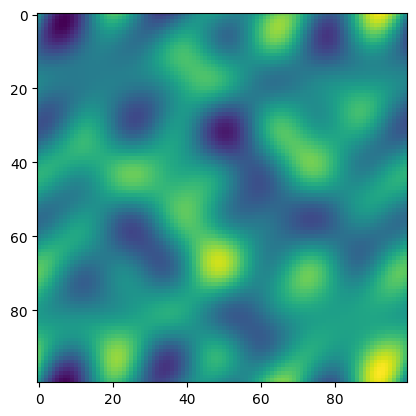

In [7]:
import matplotlib.pyplot as plt
print(field.shape)
plt.imshow(field[0,:,:])